## 数据分析

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### 统计量分析

In [4]:
df = pd.read_csv('./lianjia/lianjia/Data.csv')
df.describe()

,total_price,unit_price
count,2998.000000,2998.000000
mean,128.540560,15362.356237
std,102.576454,6377.058592
min,14.000000,2596.000000
25%,71.500000,11125.250000
50%,100.000000,14123.000000
75%,150.000000,18400.250000
max,2000.000000,53770.000000


<IPython.core.display.Javascript object>


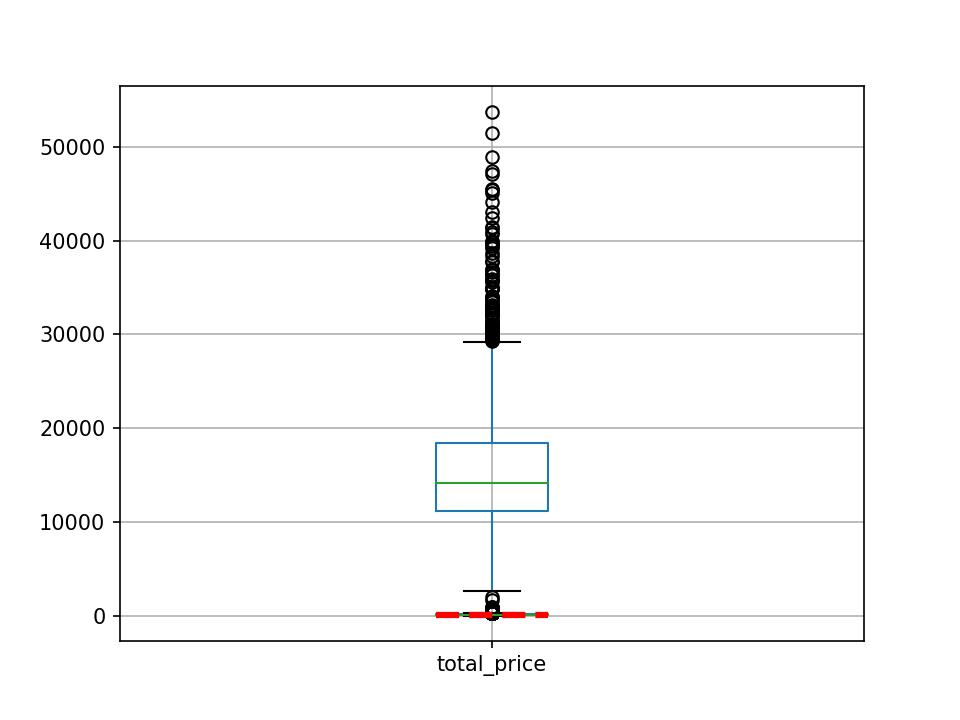

In [9]:
fig1 = plt.figure()
df.boxplot(column='unit_price')  #生成箱型图
#展示均值线

f = df.boxplot(column='total_price',meanline=True,showmeans=True,return_type='dict')

for mean in f['means']:
    mean.set(color='r', linewidth=3)

plt.show()

### 分布分析

<IPython.core.display.Javascript object>


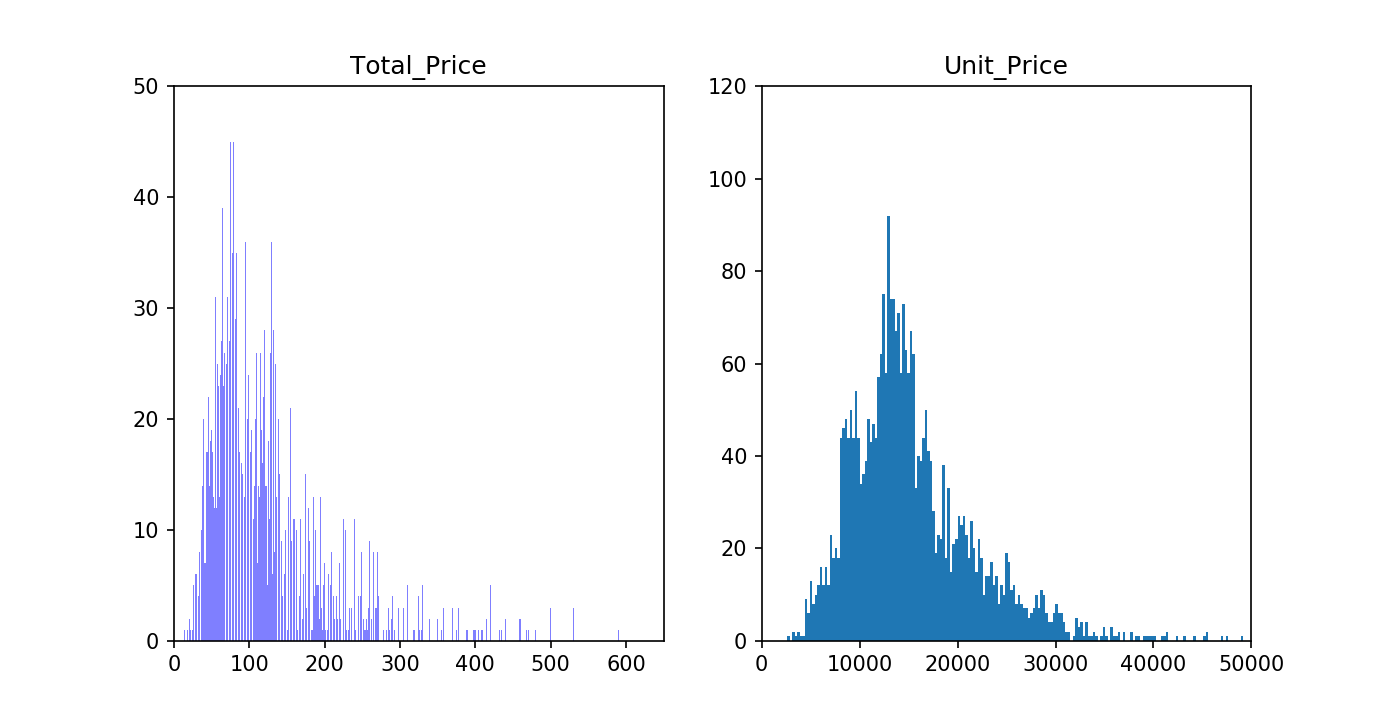

In [19]:
#生成2个子图
fig2 = plt.figure()
ax1 = fig2.add_subplot(121)  #展示总价信息
ax2 = fig2.add_subplot(122)  #展示单价信息

def count_elements(scores): #定义转换函数，统计每个数值对应多少个
    scorescount = {}  #定义一个字典对象
    for i in scores:
        scorescount[int(i)] = scorescount.get(int(i), 0) + 1 #累加每个整数数值的个数
    return scorescount

#part1 展示总价和单价的分布直方图

counted1 = count_elements(df["total_price"])
ax1.set_title("Total_Price")
ax1.bar(list(counted1.keys()),counted1.values(),0.8,alpha=0.5,color='b')

# counted2 = count_elements(df["unit_price"])
ax2.set_title("Unit_Price")
# ax2.bar(list(counted2.keys()),counted2.values(),0.8,alpha=0.5,color='r')
# 使用频率分布直方图的形式显示
ax2.hist(df['unit_price'], bins = 200)

ax1.axis([0, 650, 0, 50])
ax2.axis([0, 50000, 0, 120])
plt.show()
#part1 展示总价和单价的分布直方图 结束
# ax1.axis([0, 1000, 0, ])
# ax1.hist(sample_int, bins = 200)

### 二八定律验证

<IPython.core.display.Javascript object>


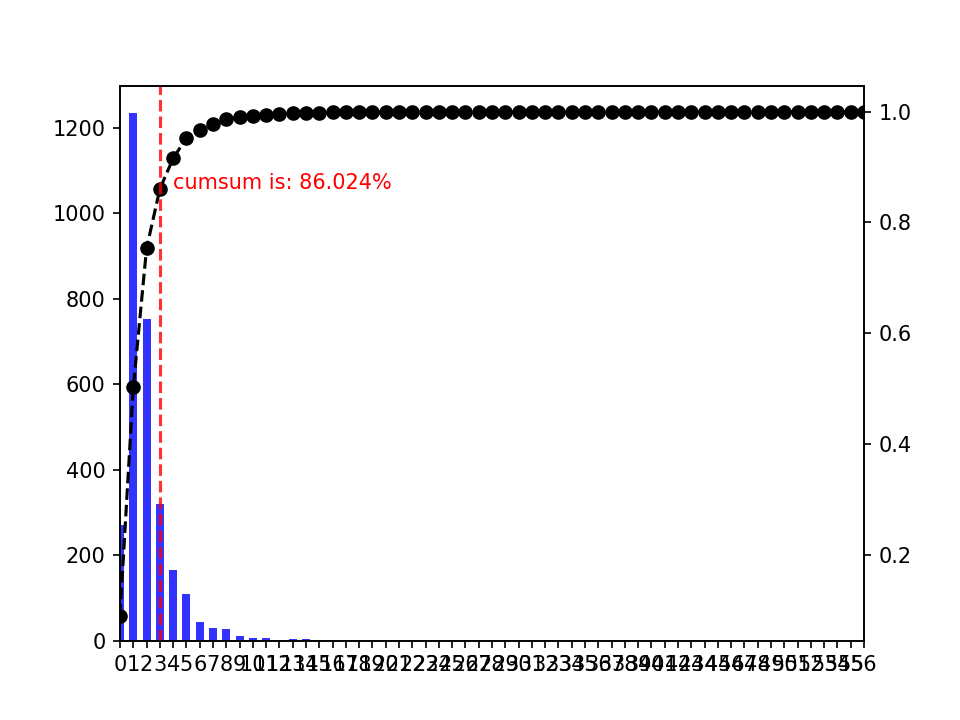

超过80%累计占比的节点值： 200
超过80%累计占比的节点值索引位置为： 3
------


In [21]:
sections = list(np.arange(0,2900,50))
mylabels = list(np.arange(25,2850,50))  #生成x轴上的标签
result1 = pd.cut(df.total_price,sections,labels=mylabels)
result2=result1.value_counts().sort_index()
fig3 = plt.figure()
df_counts = pd.Series(result2.values)  #频数，每个区间中房子的个数
# print("----------df_counts-------------")
# print(df_counts)

df_freq = df_counts/df_counts.sum()    #频率，每个区间的房子个数/总个数，即每个区间的占比
# print("----------df_freq-------------")
# print(df_freq)

cum_ratio = df_freq.cumsum()           #累计频率，累计百分比
# print("----------df_cum_freq-------------")
# print(cum_ratio)

df_counts.plot(kind = 'bar', color = 'b', alpha = 0.8, width = 0.6)  #频数的直方图
key = cum_ratio[cum_ratio>0.8].index[0]  #找到大于80%的累计频率对应的索引号
key_num = df_counts.index.tolist().index(key)  #找到对应的索引序号
print('超过80%累计占比的节点值：' ,(key+1)*50)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')
cum_ratio.plot(style = '--ko', secondary_y=True)  #累计频率的曲线图
plt.axvline(key_num,  color = 'r', linestyle = '--', alpha = 0.8) #把80%占比的参考线画出来，直接是key_num，因为它是X轴的索引值
plt.text(key_num+1,cum_ratio[key],'cumsum is: %.3f%%' % (cum_ratio[key]*100), color = 'r')  # 文字提示信息

plt.show()

#### 基本符合二八定律